In [1]:
#importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# Loading the data
data = pd.read_csv("./CrimesChicago.csv")
data.head()

C:\Users\raman\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11034701,JA366925,01/01/2001 11:00:00 AM,016XX E 86TH PL,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,8.0,45.0,11,NaN,NaN,2001,08/05/2017 03:50:08 PM,NaN,NaN,NaN
1,11227287,JB147188,10/08/2017 03:00:00 AM,092XX S RACINE AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,...,21.0,73.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
2,11227583,JB147595,03/28/2017 02:00:00 PM,026XX W 79TH ST,0620,BURGLARY,UNLAWFUL ENTRY,OTHER,False,False,...,18.0,70.0,05,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
3,11227293,JB147230,09/09/2017 08:17:00 PM,060XX S EBERHART AVE,0810,THEFT,OVER $500,RESIDENCE,False,False,...,20.0,42.0,06,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
4,11227634,JB147599,08/26/2017 10:00:00 AM,001XX W RANDOLPH ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,...,42.0,32.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN


### 1) Dealing with missing values and extra attributes

In [3]:
# Filtering only the required features
data = data.drop(['Case Number','FBI Code','X Coordinate','Y Coordinate','Updated On','Latitude','Longitude','Location'], axis=1)
data.head()

,ID,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Year
0,11034701,01/01/2001 11:00:00 AM,016XX E 86TH PL,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,412,4.0,8.0,45.0,2001
1,11227287,10/08/2017 03:00:00 AM,092XX S RACINE AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,2222,22.0,21.0,73.0,2017
2,11227583,03/28/2017 02:00:00 PM,026XX W 79TH ST,0620,BURGLARY,UNLAWFUL ENTRY,OTHER,False,False,835,8.0,18.0,70.0,2017
3,11227293,09/09/2017 08:17:00 PM,060XX S EBERHART AVE,0810,THEFT,OVER $500,RESIDENCE,False,False,313,3.0,20.0,42.0,2017
4,11227634,08/26/2017 10:00:00 AM,001XX W RANDOLPH ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,122,1.0,42.0,32.0,2017


In [4]:
# checking if any columns have null values
print(data.apply(lambda col: sum(col.isnull())))
print('The data size before dropping null values: {}'.format(data.shape[0]))

# dropping the rows with missing values
data = data.dropna(how = 'any')
print('The data size after dropping null values: {}'.format(data.shape[0]))

ID                           0
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      6302
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614828
Community Area          613495
Year                         0
dtype: int64
The data size before dropping null values: 7079493
The data size after dropping null values: 6457074


I have removed the following features: 'Case Number', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Updated On', 'Latitude', 'Longitude', 'Location' as they are not so important for our analysis.

Further, the rows with null values have been removed. Approximately 8.79% of the total rows were removed. Although removing the instances with missing values may result in a biased dataset, the effect of removing 8.79% of the total values seems reasonable.

### 2) Relationship between crime and date/time

In [5]:
# convert the data in the date column to datetime object
data['Date'] = pd.to_datetime(data.Date)

In [6]:
# identify weekends
def isWeekend(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return True
    else:
        return False

# identify seasons
def getSeason(row):
    if row.month == 11 or row.month == 0 or row.month == 1:
        return 'Winter'
    elif row.month == 2 or row.month == 3 or row.month == 4:
        return 'Spring'
    elif row.month == 5 or row.month == 6 or row.month == 7:
        return 'Summer'
    else:
        return 'Fall'

# determine the weekend and season from the 'Date' feature and add them to the data frame
data['Weekend'] = data['Date'].apply(isWeekend)
data['Season'] = data['Date'].apply(getSeason)

#### crimes by day of week

Crimes over the weekdays: 4657419
Crimes over the weekends: 1799655

Percentage of weekend crimes: 27.87106048343259


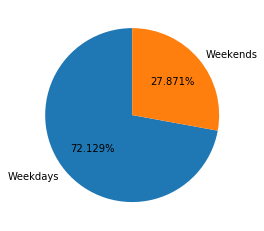

In [7]:
# weekday crimes
weekday_crimes = data['Weekend'].value_counts()[0]
print('Crimes over the weekdays: {}'.format(weekday_crimes))

# weekend crimes
weekend_crimes = data['Weekend'].value_counts()[1]
print('Crimes over the weekends: {}'.format(weekend_crimes))

# percentage of weekend crimes
percentage = (100 * weekend_crimes) / (weekend_crimes + weekday_crimes)
print('\nPercentage of weekend crimes: {}'.format(percentage))

#visualization
plt.pie([weekday_crimes, weekend_crimes], labels = ['Weekdays', 'Weekends'], autopct='%.3f%%',startangle = 90)
plt.show()

We observe that 27.87% of the total crimes occured over the weekend and the remaining occured during weekdays. This means that about 30% of the total crimes have occured only on the weekends (Saturdays and Sundays).

#### crimes by season

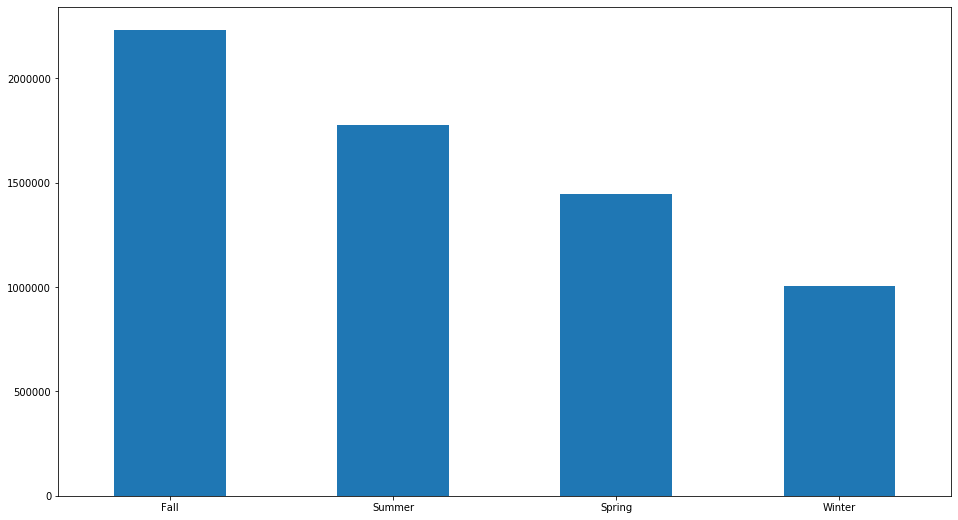

In [8]:
data['Season'].value_counts().plot(kind='bar', figsize=(16, 9), rot = 0)

We observe that the number of crimes during winter is less. May be even criminals don't like the extreme winter weather of Chicago. The next lowest number of crimes can be seen during the spring as it is cold too. The number of crimes is very high during the summer and fall which have relatively warm weather.

### 3 Investigating the crime over years

2001      4158
2002    353610
2003    475902
2004    469309
2005    453654
2006    448066
2007    436860
2008    426769
2009    392483
2010    370118
2011    351365
2012    335622
2013    307051
2014    275139
2015    263842
2016    268141
2017    267336
2018    266969
2019    257548
Name: Year, dtype: int64


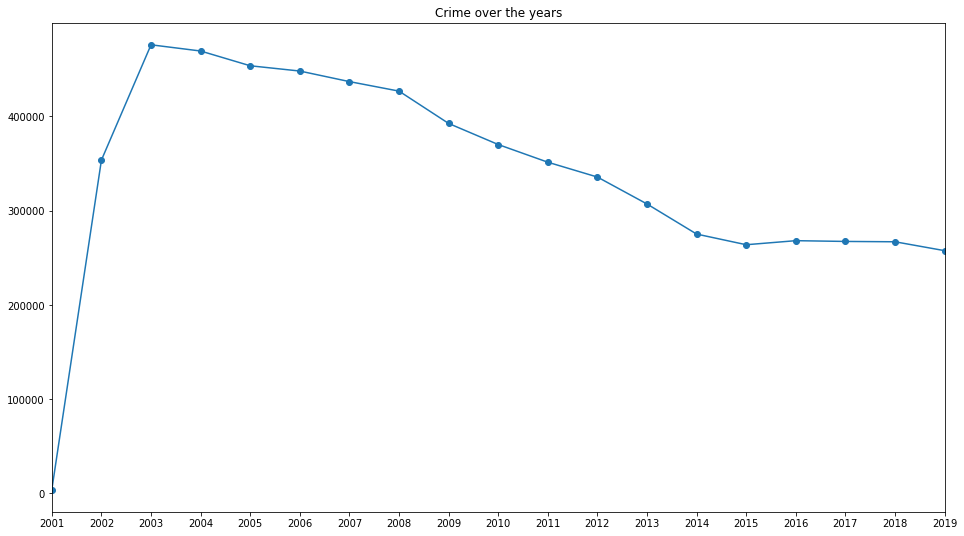

In [9]:
# Getting the crimes for each year
crimes_by_years = data['Year'].value_counts()
crimes_by_years.sort_index(ascending = True, inplace = True)

# considering crimes only till 2019 as 2020 is still in progress
crimes_by_years.drop(2020, inplace = True)
print(crimes_by_years)

years = [y for y in range(2001, 2020)]

# Visualizing the trend
crimes_by_years.plot(x = 'Year', y = 'Crime Count', title = 'Crime over the years', kind = 'line', figsize = (16, 9), xticks= years, marker = 'o')

Visualization of results is only done till the year 2019 as 2020 is still in progress. As the data for year 2020 is incomplete we would get biased results for this year.

There was a huge increase in the number of reported crimes from 2001 to 2002 and from 2002 to 2003.
The highest number of crimes reported was during the year 2003. Since then, crimes decreased every year till 2015.
In the year 2016, the crimes increased again and later they decreased till 2019.

### 4) Relation between type of crime and whether an arrest was made

In [10]:
# grouping by type of crime and arrest
crime_and_arrest = data.groupby( ['Primary Type', 'Arrest'] )
crime_and_arrest = crime_and_arrest.count()['ID']

percentages = {}

# calculating the probability/percentage of arrest for each crime
for i in range(0, len(crime_and_arrest.keys()), 2):
    crime = crime_and_arrest.keys()[i][0]
    
    no_arrests = crime_and_arrest[i]
    arrests = crime_and_arrest[i+1]
    
    percentage = (arrests * 100) / (no_arrests + arrests)
    percentages[crime] = percentage
    
percentages = sorted(percentages.items(), key = lambda p: p[1], reverse = True)

print('The odds of getting arrested for various crimes are: \n')
for entry in percentages:
    print(entry[0] + " - " +  str(entry[1]))

The odds of getting arrested for various crimes are: 

PROSTITUTION - 99.56816174305624
PUBLIC INDECENCY - 99.39393939393939
NARCOTICS - 99.37047453049905
GAMBLING - 99.24890310106343
LIQUOR LAW VIOLATION - 98.99391480730223
CONCEALED CARRY LICENSE VIOLATION - 96.52014652014653
INTERFERENCE WITH PUBLIC OFFICER - 92.61899009422565
OBSCENITY - 80.50713153724247
WEAPONS VIOLATION - 78.04433605524196
CRIMINAL TRESPASS - 71.98148539590142
OTHER NARCOTIC VIOLATION - 68.25396825396825
PUBLIC PEACE VIOLATION - 66.61475906220261
HOMICIDE - 46.66461095693288
NON-CRIMINAL (SUBJECT SPECIFIED) - 33.333333333333336
SEX OFFENSE - 28.745522664580676
ASSAULT - 22.823261737829384
BATTERY - 22.763939253970157
OFFENSE INVOLVING CHILDREN - 19.88361235967255
OTHER OFFENSE - 18.05031069551839
INTIMIDATION - 16.221222545646995
NON - CRIMINAL - 15.789473684210526
STALKING - 15.27122641509434
DECEPTIVE PRACTICE - 14.874799770302536
CRIM SEXUAL ASSAULT - 14.760511882998172
RITUALISM - 13.333333333333334
ARSON - 

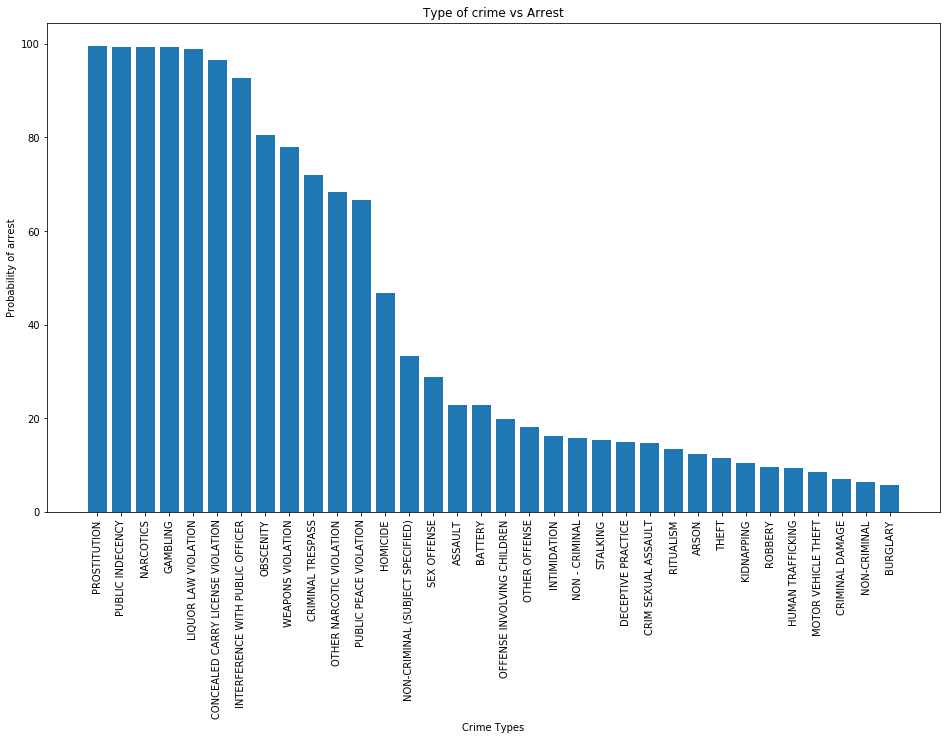

In [11]:
# visualization of above results

crime_types = []
probs = []

for val in percentages:
    crime_types.append(val[0])
    probs.append(val[1])
    
plt.figure(figsize=(16,9))
plt.title('Type of crime vs Arrest')
plt.xlabel('Crime Types')
plt.ylabel('Probability of arrest')
plt.bar(crime_types, probs)
plt.xticks(range(len(crime_types)), crime_types, rotation = 90)
plt.show()

By calculating the probability/percentage of being arrested for each type of crime we observe that

#### Likelihood of arrest is more (> 90%) for the following crimes:
Prostituition, Public indecency, Narcotics, Gambling, Liqour law violation, Concealed carry license violation and Interference with public officer.

#### Likelihood of arrest is less (< 10%) for:
Burglary, Non-criminal, Criminal damage, Motor vehicle theft, Human Trafficking and Robbery.

### 5) Crimes by Region

#### Overall picture

In [12]:
# overall crimes by ward
overall_ward_crimes = data['Ward'].value_counts().to_frame()
overall_ward_crimes.reset_index(inplace = True)
overall_ward_crimes.rename(columns = {'index':'Ward', 'Ward':'Total Crimes'}, inplace = True)

print('The top 5 wards with highest number of crimes from 2001 to 2020 are:\n')
print(overall_ward_crimes.head())

The top 5 wards with highest number of crimes from 2001 to 2020 are:

   Ward  Total Crimes
0  28.0        295799
1  42.0        266253
2  24.0        254991
3   2.0        243393
4  27.0        237895


#### Year wise breakdown

In [13]:
# year wise crimes by ward
ward_crimes_by_year = data.groupby( ['Year', 'Ward'] )
ward_crimes_by_year = ward_crimes_by_year.count()['ID']

years = [y for y in range(2001, 2021)]

print('The top 5 wards with most number of crimes over the years:')
for year in years:
    print('\nFor the year {} '.format(year))
    
    top_5_wards = ward_crimes_by_year[year].nlargest(n = 5)
    print(top_5_wards)

The top 5 wards with most number of crimes over the years:

For the year 2001 
Ward
28.0    234
24.0    221
27.0    191
42.0    145
17.0    136
Name: ID, dtype: int64

For the year 2002 
Ward
2.0     14306
28.0    13976
3.0     13702
27.0    13701
42.0    12956
Name: ID, dtype: int64

For the year 2003 
Ward
28.0    20795
2.0     20088
3.0     18524
27.0    17809
24.0    16752
Name: ID, dtype: int64

For the year 2004 
Ward
28.0    20864
2.0     19018
27.0    17814
24.0    17611
3.0     17184
Name: ID, dtype: int64

For the year 2005 
Ward
28.0    20587
2.0     17695
27.0    17584
24.0    17102
3.0     16177
Name: ID, dtype: int64

For the year 2006 
Ward
28.0    21570
2.0     16907
24.0    16630
27.0    16301
20.0    15745
Name: ID, dtype: int64

For the year 2007 
Ward
28.0    19566
2.0     16213
24.0    16132
17.0    15453
20.0    15351
Name: ID, dtype: int64

For the year 2008 
Ward
28.0    18874
2.0     15744
24.0    15551
42.0    15105
17.0    15071
Name: ID, dtype: int64

For th

#### Observations from the above results 

#### 2003 - 2015
The highest number of crimes were always reported in the ward 28.

#### 2016- 2020
The highest number of crimes always occurred in ward the 42 during these years.
The wards 42, 28, 24 and 27 were always among the top 5 wards with highest crimes.

#### 2002 - 2008
The wards 2 and 28 were always the top two wards with highest reported crimes.

#### 2008 - 2020
The wards 42, 28, 24 always were among the top 5 wards with highest reported crimes.

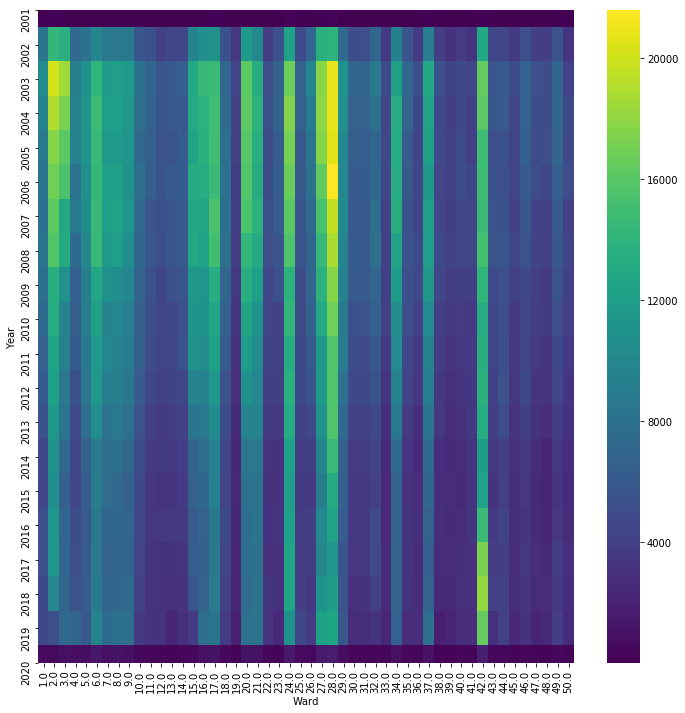

In [14]:
# visualization of above results

temp = ward_crimes_by_year.unstack(level = -1)

fig, ax = plt.subplots(figsize=(12, 12))

ax = sns.heatmap(temp, cmap="viridis")

#### Observations from the heatmap

In 2001, none of the wards reported more than 250 crimes. The highest number of crimes that occurred in any ward from 2001 - 2020 was in the year 2006 and in the ward 28. The ward 19 seems the ward with lowest number of crimes over the years. 

### 6) Percentage of domestic crimes with arrests

False    694572
True     170061
Name: Arrest, dtype: int64

Percentage of domestic crimes with arrests: 19.6685761473365 %


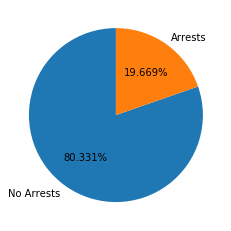

In [15]:
# retrieving the domestic crimes
domestic_crimes = data[ data['Domestic'] == True ]
print(domestic_crimes['Arrest'].value_counts())

# calculating the percentage of domestic crimes with arrests
no_arrests = domestic_crimes['Arrest'].value_counts()[0]
arrests = domestic_crimes['Arrest'].value_counts()[1]

percentage = (100 * arrests) / (arrests + no_arrests)
print('\nPercentage of domestic crimes with arrests: {} %'.format(percentage))

# visualization
plt.pie([no_arrests, arrests], labels = ['No Arrests', 'Arrests'], autopct='%.3f%%', startangle = 90)
plt.show()

### 7) Some other interesting insights

#### i) Different categories of theft

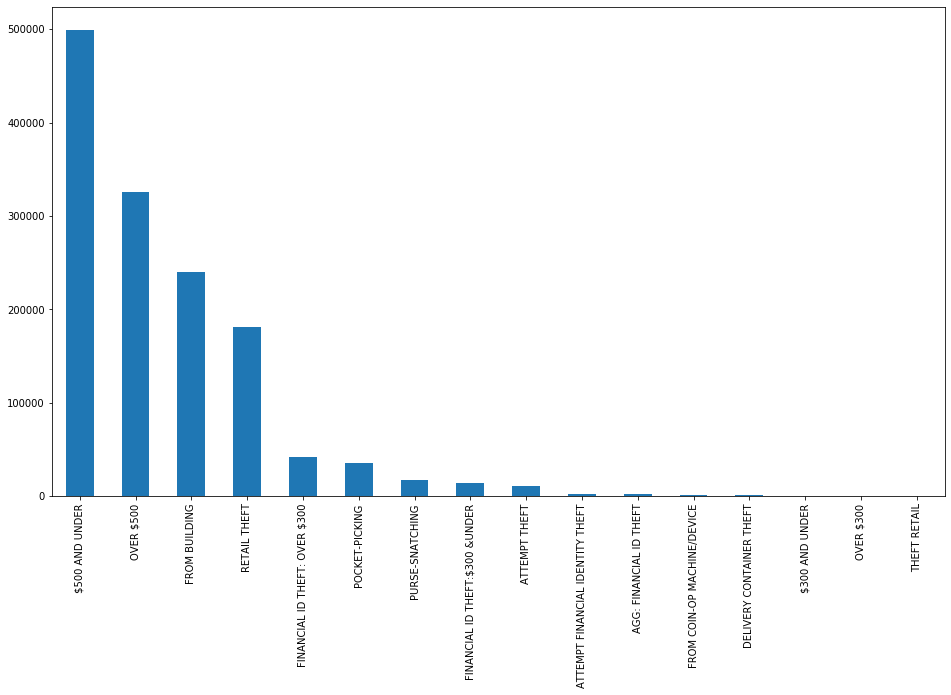

In [16]:
# retrieving all thefts
thefts = data[data['Primary Type'] == 'THEFT']

# identifying different categories of theft
thefts_with_categories = thefts['Description'].value_counts()

# visualization
thefts_with_categories.plot(kind = 'bar', figsize = (16, 9))

we observe that ``500$ and under , over $ 500, theft from building and retail theft`` are the most common type of thefts.

#### ii) Variation of type of crime with location of crime

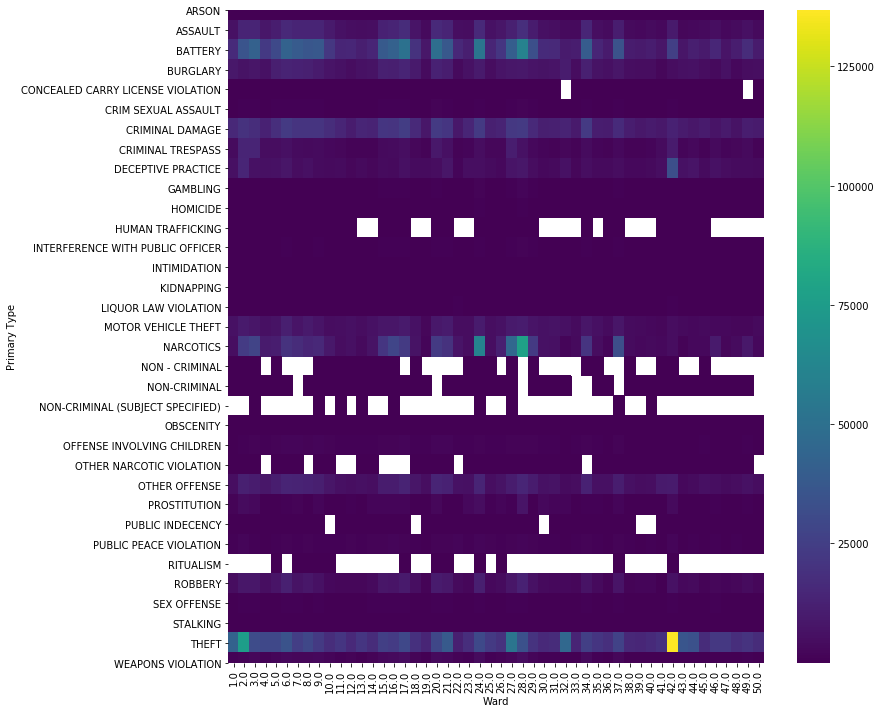

In [17]:
# grouping by crime type and ward
crimes_by_type_and_ward = data.groupby( ['Primary Type', 'Ward'] )
crimes_by_type_and_ward = crimes_by_type_and_ward.count()['ID']

temp = crimes_by_type_and_ward.unstack(level = -1)

# visualization
fig, ax = plt.subplots(figsize=(12, 12))
ax = sns.heatmap(temp, cmap="viridis")

We observe that ``theft`` is the most common crime across all the wards. The ward 42 has the highest number of thefts as indicated by the ``yellow`` cell of the heatmap at the bottom. Other common crimes across all the wards are assault, battery, burglary, criminal damage, deceptive practice, motor vehicle theft, narcotics and other offense.

The cells with ``white`` color in the heatmap indicate that such type of crime did not occur in the respective ward. Thus, we observe that ``ritualism and non-criminal (subject specified)`` occurred only in few wards. 